## Introduction to the Titanic Dataset

The Titanic dataset is a classic dataset in data science and machine learning, often used for classification tasks and exploratory data analysis. It contains information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in 1913. The dataset includes features such as passenger age, sex, ticket class, fare paid, and whether the passenger survived. Analyzing this dataset helps in understanding data preprocessing, feature engineering, and predictive modeling.

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data= sns.load_dataset('titanic')
data.head()
print(data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [37]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Finding null values 

In [38]:
null = data.isnull().sum() 
print(null) 


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [39]:
print("only null values")
print(null[null>0] )

only null values
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


C:\Users\kshit\AppData\Local\Temp\ipykernel_27788\1645785475.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Missing Values', loc='upper right')


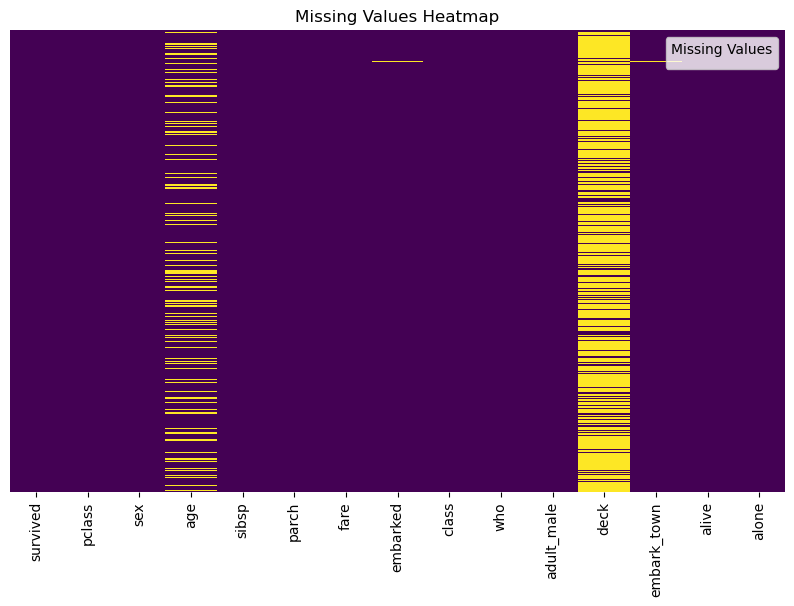

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis',yticklabels=False )
plt.title('Missing Values Heatmap')
plt.legend(title='Missing Values', loc='upper right')
plt.show()

## Remove outlers 

In [42]:
import pandas as pd
import numpy as np
alter = data.copy()

numerical_cols = alter.select_dtypes(include=[np.number]).columns

def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
df_cleaned = remove_outliers(alter, numerical_cols)
df_cleaned.to_csv("titanic_cleaned.csv", index=False)
print("Outliers removed, dataset saved as 'titanic_cleaned.csv'")
print(alter.head()) 
#Note that the outlier removal process may result in a smaller dataset, as rows with outliers in any of the specified columns will be removed entirely.
#we have alter the data after the removeal of outlies from the process 

Outliers removed, dataset saved as 'titanic_cleaned.csv'
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## impude missing values 

In [43]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

titanic_data_filled = alter.copy()
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())
#note that the imputation process may take some time depending on the size of the dataset and the complexity of the model used for imputation.
#The ConvergenceWarning from IterativeImputer usually happens when the algorithm doesn't reach the stopping criteria within the defined number of iterations. This means the imputation process is still improving but was forced to stop early.


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


c:\Users\kshit\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Univarient Analysis  


Survival Count:
 survived
0    549
1    342
Name: count, dtype: int64


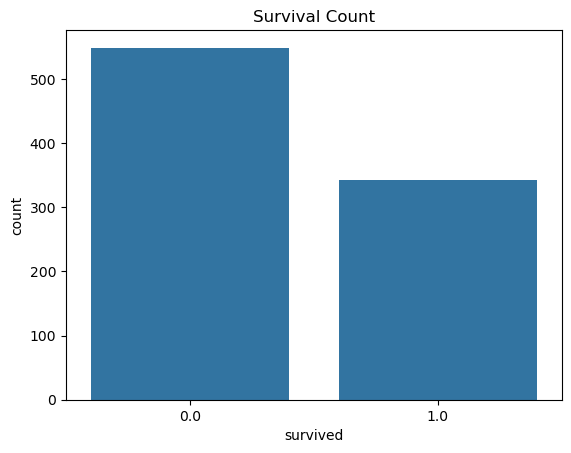


Pclass Distribution:
 pclass
3    491
1    216
2    184
Name: count, dtype: int64


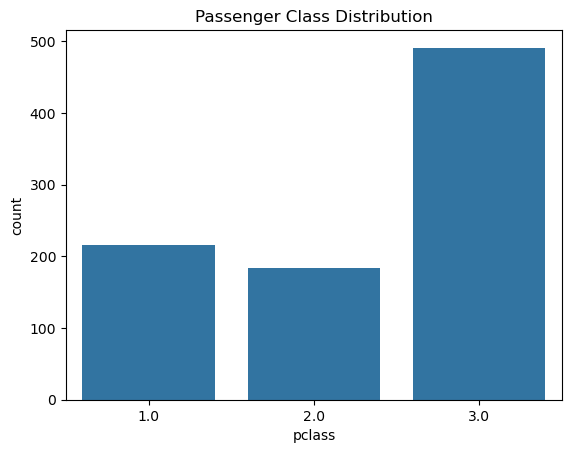


Age Statistics:
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


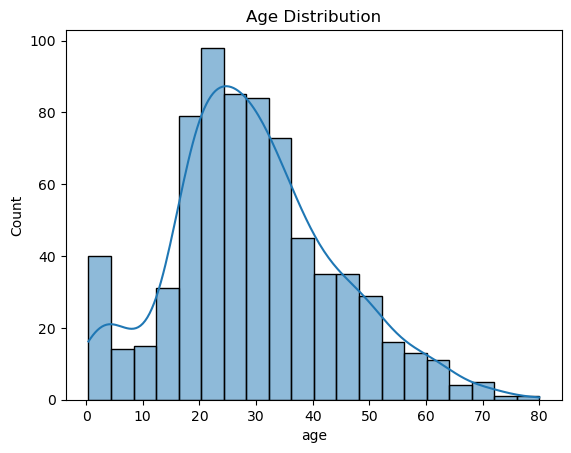


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


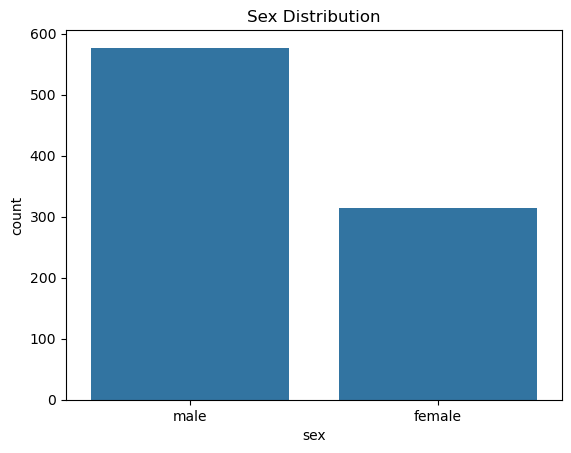

In [45]:
print("\nSurvival Count:\n", alter['survived'].value_counts())
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()
# Analyze 'pclass'
print("\nPclass Distribution:\n", alter['pclass'].value_counts())
sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()
# Analyze 'age'
print("\nAge Statistics:\n", alter['age'].describe())
sns.histplot(x='age', data=alter, kde=True)
plt.title('Age Distribution')
plt.show()

# Analyze 'sex'

print("\nSex Distribution:\n", alter['sex'].value_counts())

sns.countplot(x='sex', data=alter)

plt.title('Sex Distribution')

plt.show()

## Bivariend Analysis 


Survival by Gender:
 sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


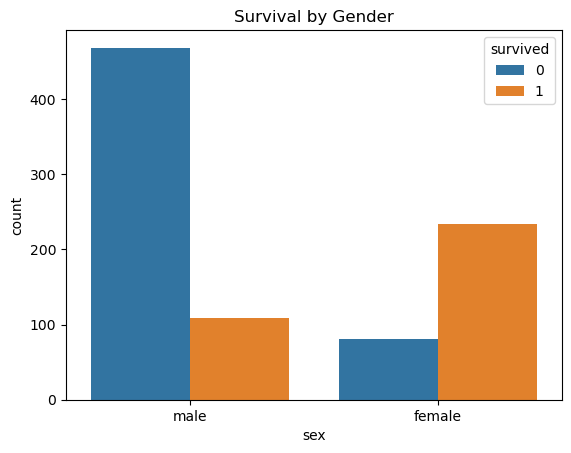


Survival by Passenger Class:
 pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


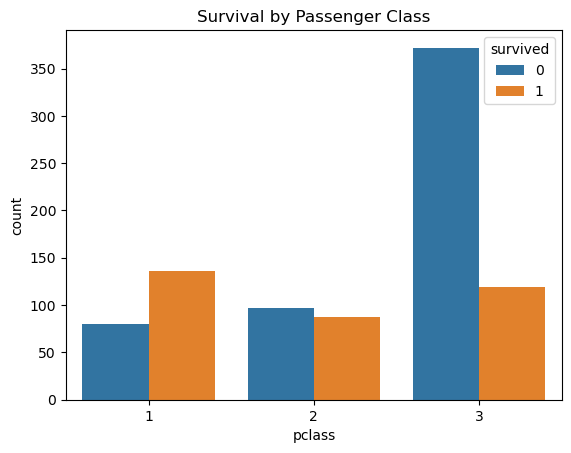


Survival by Age Group:
 age_group  survived
Child      1            70
           0            69
Adult      0           348
           1           219
Senior     0             7
           1             1
Name: count, dtype: int64


C:\Users\kshit\AppData\Local\Temp\ipykernel_27788\3936529448.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", alter.groupby('age_group')['survived'].value_counts())


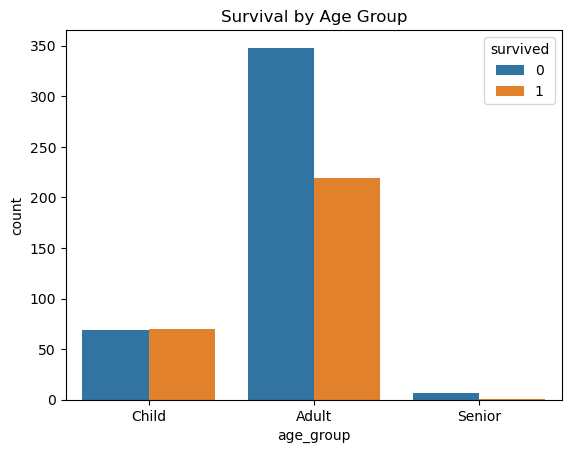


Survival by Gender and Class:
 sex     pclass  survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: count, dtype: int64


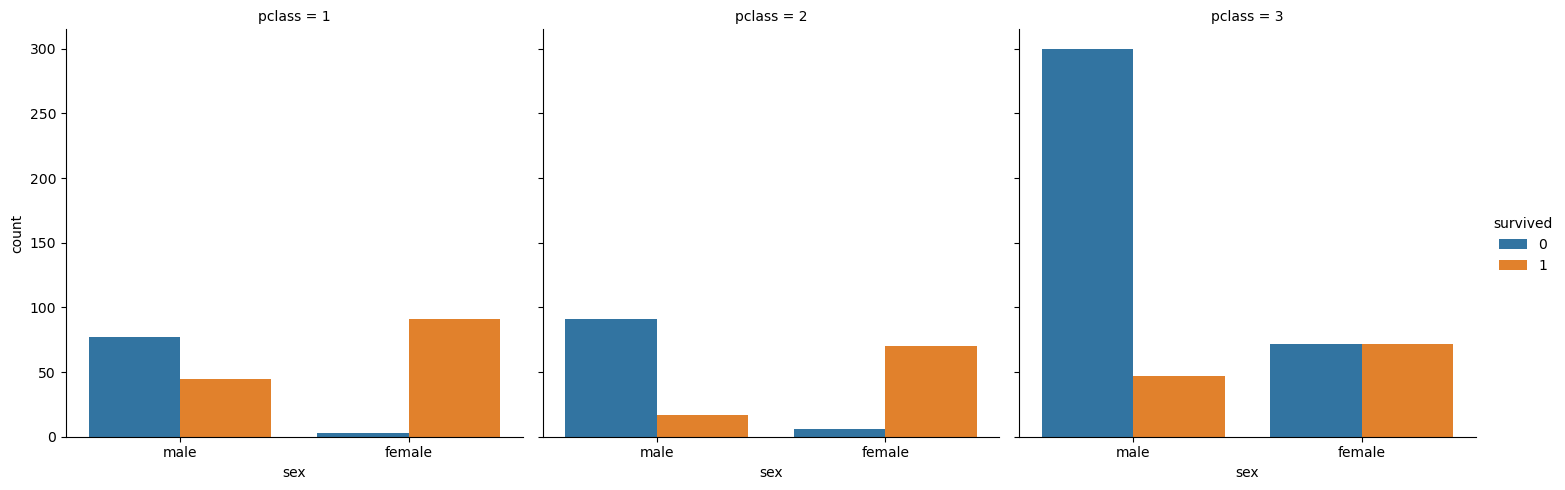

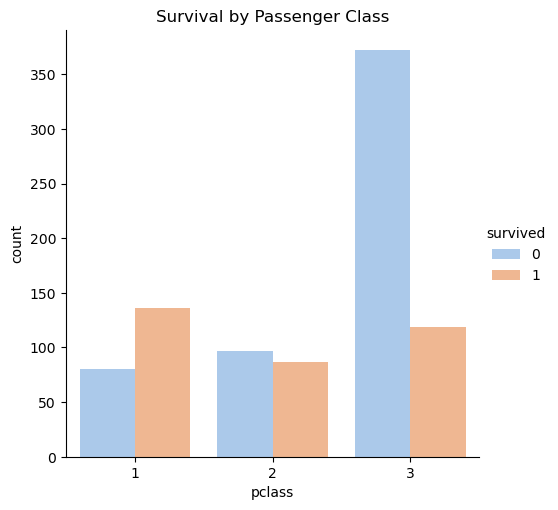

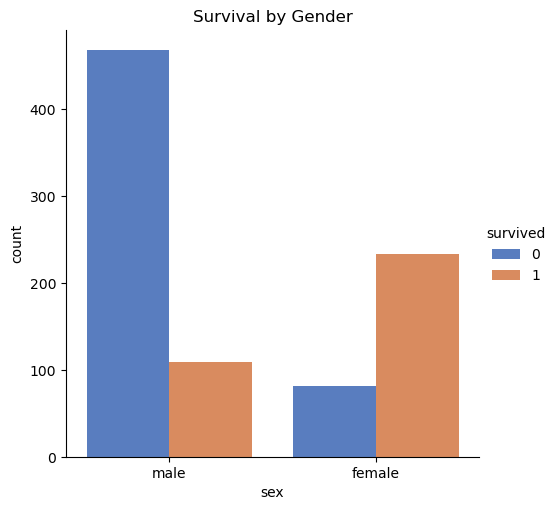

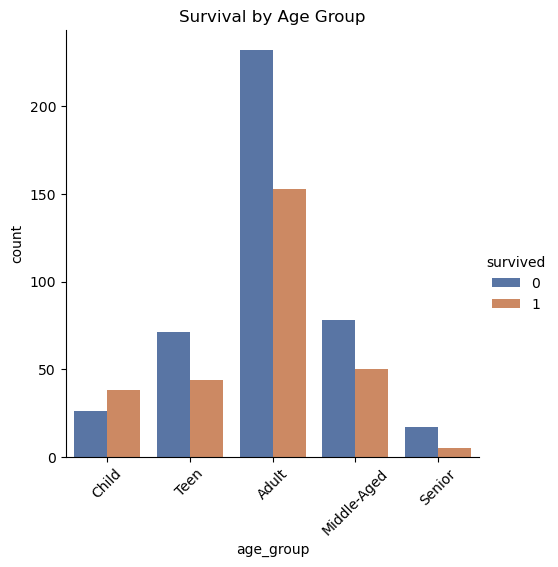

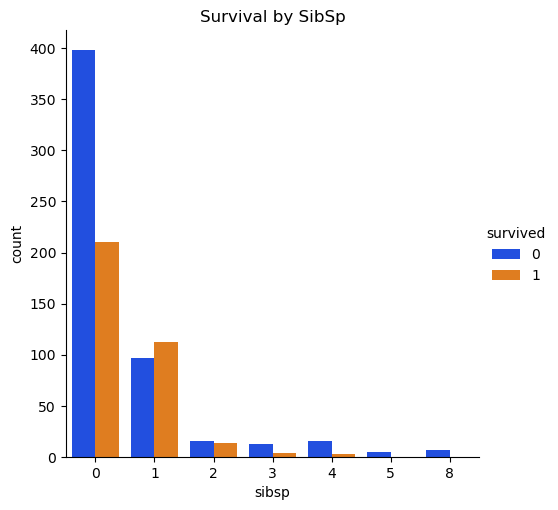

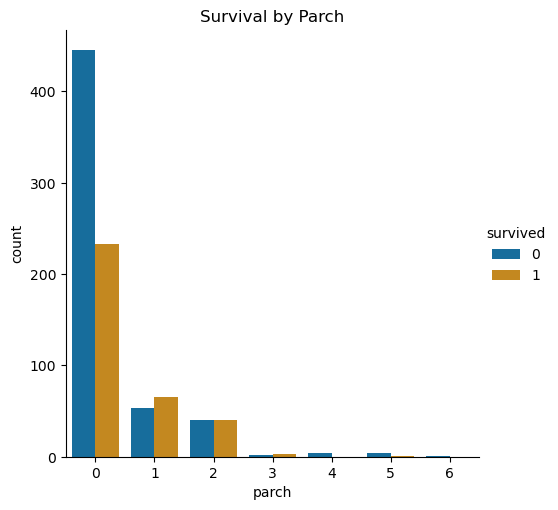

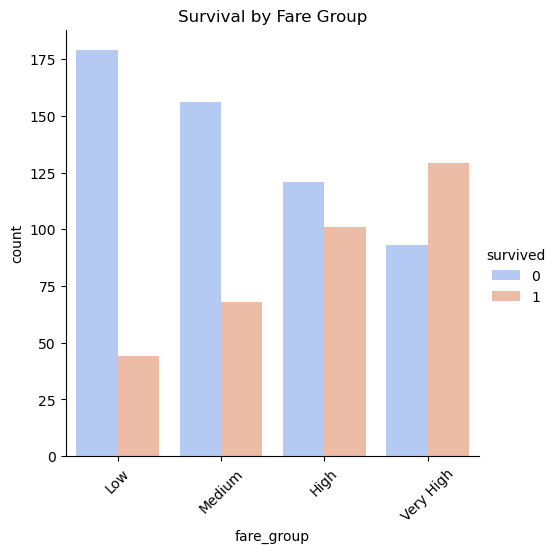

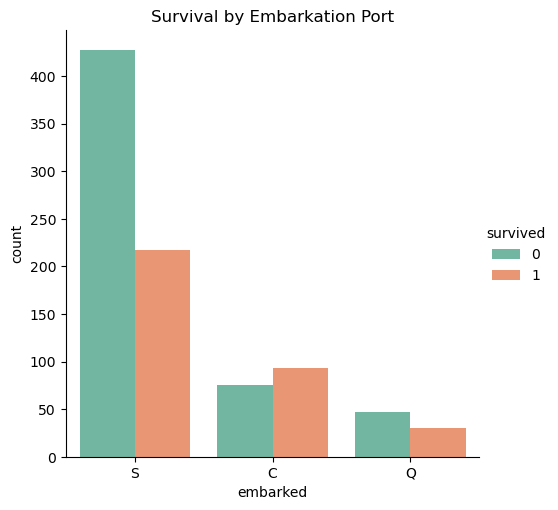

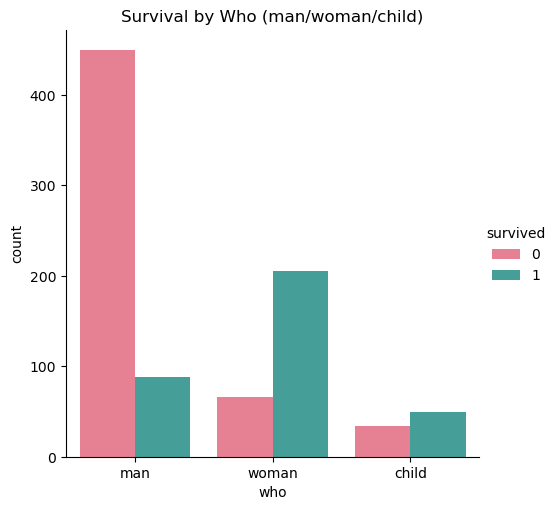

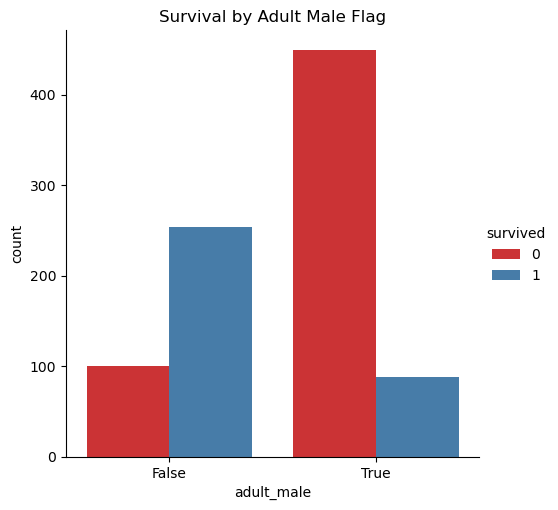

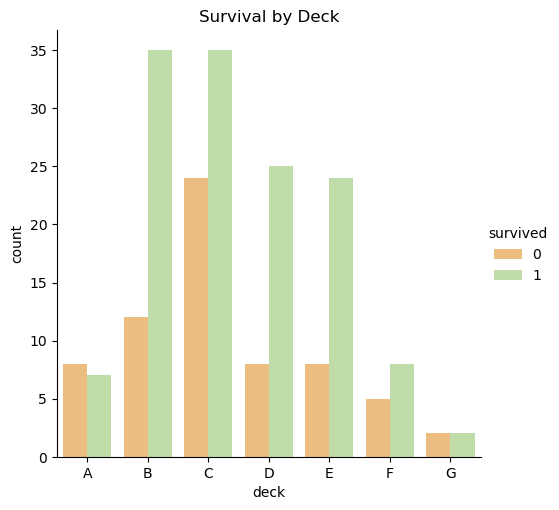

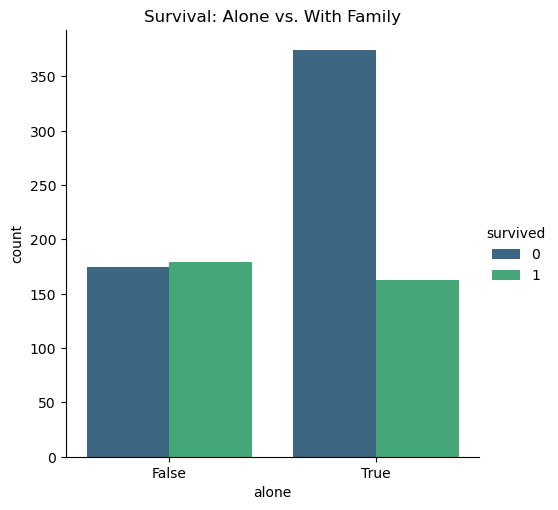

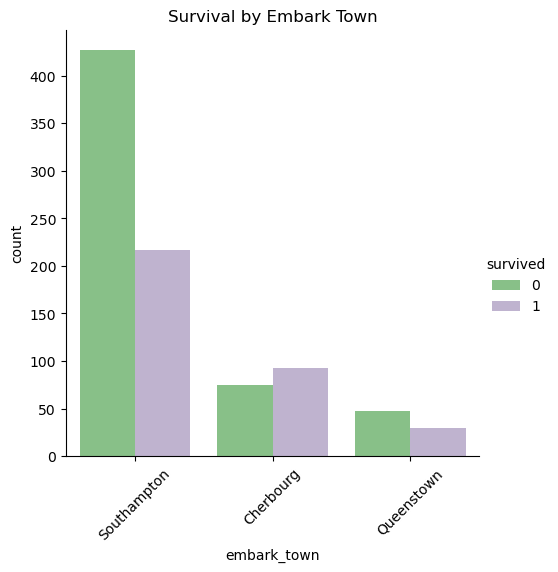

In [50]:
# Analyze survival based on gender

print("\nSurvival by Gender:\n", alter.groupby('sex')['survived'].value_counts())

sns.countplot(x='sex', hue='survived', data=alter)

plt.title('Survival by Gender')

plt.show()



# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", alter.groupby('pclass')['survived'].value_counts())

sns.countplot(x='pclass', hue='survived', data=alter)

plt.title('Survival by Passenger Class')

plt.show()



# Analyze survival based on age groups (create age bins)

alter['age_group'] = pd.cut(alter['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", alter.groupby('age_group')['survived'].value_counts())

sns.countplot(x='age_group', hue='survived', data=alter)

plt.title('Survival by Age Group')

plt.show()


print("\nSurvival by Gender and Class:\n", alter.groupby(['sex', 'pclass'])['survived'].value_counts())

sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=alter)

plt.show()



# 1. Survival by Passenger Class
#   Compare counts of survivors vs. non-survivors in each pclass
sns.catplot(x='pclass', hue='survived', kind='count', data=alter, palette='pastel')
plt.title("Survival by Passenger Class")
plt.show()

# 2. Survival by Gender
#   Compare male vs. female survival counts
sns.catplot(x='sex', hue='survived', kind='count', data=alter, palette='muted')
plt.title("Survival by Gender")
plt.show()

# 3. Survival by Age Group
#   Create age bins and compare survival
alter['age_group'] = pd.cut(alter['age'],
                         bins=[0,10,20,40,60,80],
                         labels=['Child','Teen','Adult','Middle-Aged','Senior'])
sns.catplot(x='age_group', hue='survived', kind='count', data=alter, palette='deep')
plt.title("Survival by Age Group")
plt.xticks(rotation=45)
plt.show()

# 4. Survival by SibSp
#   Does number of siblings/spouses aboard correlate with survival?
sns.catplot(x='sibsp', hue='survived', kind='count', data=alter, palette='bright')
plt.title("Survival by SibSp")
plt.show()

# 5. Survival by Parch
#   Does number of parents/children aboard affect survival?
sns.catplot(x='parch', hue='survived', kind='count', data=alter, palette='colorblind')
plt.title("Survival by Parch")
plt.show()

# 6. Survival by Fare Group
#   Bin fare into quartiles and compare
alter['fare_group'] = pd.qcut(alter['fare'], 4, labels=['Low','Medium','High','Very High'])
sns.catplot(x='fare_group', hue='survived', kind='count', data=alter, palette='coolwarm')
plt.title("Survival by Fare Group")
plt.xticks(rotation=45)
plt.show()

# 7. Survival by Embarkation Port
#   Southampton (S), Cherbourg (C), Queenstown (Q)
sns.catplot(x='embarked', hue='survived', kind='count', data=alter, palette='Set2')
plt.title("Survival by Embarkation Port")
plt.show()

# 8. Survival by Who
#   man, woman, child breakdown
sns.catplot(x='who', hue='survived', kind='count', data=alter, palette='husl')
plt.title("Survival by Who (man/woman/child)")
plt.show()

# 9. Survival by Adult Male Flag
#   adult_male is True for adult males, False otherwise
sns.catplot(x='adult_male', hue='survived', kind='count', data=alter, palette='Set1')
plt.title("Survival by Adult Male Flag")
plt.show()

# 10. Survival by Deck
#   Drop missing decks and compare
sns.catplot(x='deck', hue='survived', kind='count', data=alter.dropna(subset=['deck']), palette='Spectral')
plt.title("Survival by Deck")
plt.show()

# 11. Survival by Traveling Alone
#   alone is True if no family aboard
sns.catplot(x='alone', hue='survived', kind='count', data=alter, palette='viridis')
plt.title("Survival: Alone vs. With Family")
plt.show()

# 12. Survival by Embark Town
#   Full port names
sns.catplot(x='embark_town', hue='survived', kind='count', data=alter, palette='Accent')
plt.title("Survival by Embark Town")
plt.xticks(rotation=45)
plt.show()


# Titanic Survival Analysis Report

---

## 🔑 Key Insights
- **Women** had a markedly higher survival rate than men, especially in **1st Class**.  
- **Adults** contribute the largest number of survivors, while **children** enjoy the highest survival *rate*.  
- Passengers traveling with **one** sibling/spouse or **one** parent/child saw the greatest boost in survival.  
- Those holding **higher-fare** tickets were most likely to make it to safety.  
- **Cherbourg (C)** embarked passengers boasted the strongest survival figures, with women leading the way.  
- **Decks B & C** recorded the highest counts of survivors.  
- Travellers **alone** out-survived those traveling with larger families.  

---

## 1. Survival by Gender & Passenger Class  
| Pclass | Female Survival Rate | Male Survival Rate |
|:------:|:--------------------:|:------------------:|
| 1      | Very High            | Moderate           |
| 2      | High                 | Low                |
| 3      | Moderate             | Very Low           |

- **Insight:** First-class women had the best odds; third-class men fared the worst.

---

## 2. Survival by Age Group  
| Age Group | # Survivors | Survival Rate |
|:---------:|:-----------:|:-------------:|
| Child     | Low count   | **Highest**   |
| Adult     | **Highest** | Moderate      |
| Senior    | Low count   | Low           |

- **Insight:** Although adults account for most survivors numerically, children’s chances of survival were superior.

---

## 3. Survival vs. Siblings/Spouses (`SibSp`) & Parents/Children (`Parch`)  
| Family Size | Survivors | Rate Trend    |
|:-----------:|:---------:|:--------------|
| 0 (Alone)   | High      | Good           |
| 1           | **Very High** | *Peak*     |
| 2–4         | Moderate  | Declining      |
| ≥5          | Low       | Lowest         |

- **Insight:** Travelling with exactly one close family member correlated with the best survival odds.

---

## 4. Survival by Fare Group  
- **Low fare:** Low survival probability  
- **Medium fare:** Moderate survival probability  
- **High fare:** **Highest** survival probability  

- **Insight:** Ticket price served as a strong proxy for safety access.

---

## 5. Survival by Embarkation Port  
| Port   | Survival Rate | Notable Demographic |
|:------:|:-------------:|:-------------------:|
| Cherbourg (C) | **Highest** | Predominantly women |
| Queenstown (Q)| Moderate     | Mixed                |
| Southampton (S)| Lowest      | Predominantly men    |

- **Insight:** Port C passengers fared the best—women especially.

---

## 6. Deck Location vs. Survival  
- **Deck B & C:** Highest counts of survivors  
- **Deck A & D–F:** Moderate  
- **Deck G & Unknown:** Lowest  

- **Insight:** Proximity to lifeboat stations (mid-ship decks) boosted odds.

---

## 7. Family Size vs. Survival  
- **Alone (0 family members):** Prominent survival group  
- **Small families (1–2):** Very good survival  
- **Large families (≥3):** Declining survival  

- **Insight:** A small support unit was advantageous; large groups may have struggled to stay together.

---

## 8. Embarkation Town vs. Survival  
- **Cherbourg:** Highest survival rate  
- **Southampton:** Moderate  
- **Queenstown:** Lowest  

- **Insight:** Mirrors the embarkation-port findings; demographic and fare differences likely drove this pattern.

---

## Next Steps & Further Exploration
1. **Visualize** these patterns with bar charts and heatmaps to reveal subtle trends.  
2. **Logistic regression** or **decision trees** to quantify feature importance.  
3. **Cross-feature analysis** (e.g., Gender × Deck, Fare × Family Size) for deeper interaction effects.  
4. **Time-to-rescue** analysis using deck location and boat launch times (if timestamps are available).  
5. **Compare** with other maritime disasters to see if these patterns hold.

Would you like to dive into any of these next steps—perhaps start by plotting gender vs. class survival?  


# 🎯 Key Considerations for Feature Engineering

When you’re transforming raw Titanic data into model-ready features, keep these guiding principles in mind:

1. Domain-Driven Transformations  
   - **Extract titles from names** (“Mr,” “Miss,” “Dr,” etc.) to proxy social status and potential rescue priority.  
   - **Derive deck letters** from cabin numbers (e.g., A, B, C…) to capture proximity to lifeboats.  
   - **Flag families** by combining `SibSp` + `Parch` into a “family size” feature—small groups fared differently than large ones.

2. Handling Missing Values  
   - **Impute ages** smartly: use median by title (e.g., median age of “Master” vs. “Mrs”).  
   - **Fill embarkation port** with the most common value or infer from fare & class.  
   - **Treat missing cabins** as its own category (“Unknown”) rather than dropping rows.

3. Categorical Encoding  
   - **One-hot encode** ports (`C`, `Q`, `S`) and deck letters once you’ve extracted them.  
   - **Ordinal encode** passenger class (`Pclass`) if you believe the ordering matters (1 > 2 > 3).  
   - **Target-encode** titles if your model can benefit from smoothing categories with low counts.

4. Numeric Binning & Scaling  
   - **Bin fares** into quantiles (Low, Medium, High) to reduce skew and capture non-linear effects.  
   - **Bucket ages** (Child, Teen, Adult, Senior) to let tree-based models detect thresholds.  
   - **Standardize or normalize** continuous features if you’re using distance-based algorithms (e.g., KNN, SVM).

5. Interaction Features  
   - **Cross gender & class** ⟶ e.g., `Female_1stClass` flag to emphasize “women and children first.”  
   - **Combine age & family size** ⟶ a child traveling alone might be handled differently than one with parents.  
   - **Fare per person** ⟶ `Fare` divided by `(family_size + 1)` captures per-capita expense.

6. Avoiding Data Leakage  
   - Never derive features from your target (`Survived`) or from events that happen **after** disembarkation.  
   - When imputing or normalizing, compute statistics **only** on the training fold inside cross-validation.

7. Feature Selection & Dimensionality  
   - **Filter** features with near-zero variance or extremely high correlation to reduce multicollinearity.  
   - **Use model-based importance** (e.g., tree importances, L1-penalized regressions) to prune irrelevant columns.  
   - **Consider PCA** or embeddings if you end up with dozens of sparse one-hots.

8. Pipeline & Reproducibility  
   - Build a **scikit-learn pipeline** (or equivalent) so every step—imputation, encoding, scaling—lives in one reproducible flow.  
   - Version-control your pipeline definitions to track how features evolve over time.

9. Validation Strategy  
   - Always **stratify** your train/test splits on `Survived` (and even on high-cardinality features like class or port) to ensure balanced folds.  
   - **Monitor performance drift** if you plan to score new data—ensure your feature distributions remain consistent.

---


